# Welcome to the notebook of *distfit*!

**distfit** is a python package for *probability density fitting* of univariate distributions on non-censored data. With the Residual Sum of Squares (RSS) we determine the best fit across 89 theoretical distributions for which the best fitted theoretical distribution is returned with the loc, scale, arg parameters. The probability of new data-points can then be assed for significance.

-------------
Knowing the underlying (probability) distribution of your data has many modeling advantages. The easiest manner to determine the underlying distribution is by visually inspecting the random variable(s) using a histogram. With the candidate distribution, various plots can be created such as the Probability Distribution Function plot (PDF/CDF), and the QQ plot. However, to determine the exact distribution parameters (e.g., loc, scale), it is essential to use quantitative methods. Read more in the Medium blog why it is important to determine the underlying probability distribution for your data set. What the differences are between parametric and non-parametric distributions. How to determine the best fit using a quantitative approach and how to confirm it using visual inspections. Analyses are performed using the distfit library, and a notebook is accompanied for easy access and experimenting.

-------------


* [Medium Blog](https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd)
* [API Documentation](https://erdogant.github.io/distfit/)
* [Github]( https://github.com/erdogant/distfit)


-------------

In [1]:
!pip install -U distfit
!pip install -U matplotlib

import distfit
print(distfit.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.6.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distfit import distfit

## Make example dataset

In [2]:
X = np.random.normal(0, 2, 5000)
y = [-8,-6,0,1,2,3,4,5,6]

In [3]:
# Initialize model with default parameters
dfit = distfit(todf=True)

# Fit on data
model = dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.08 sec] [RSS: 0.00144283] [loc=-0.013 scale=1.967]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.3395] [loc=-7.230 scale=7.217]
[distfit] >INFO> [pareto    ] [0.07 sec] [RSS: 0.586722] [loc=-8.651 scale=1.421]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.00511424] [loc=-0.008 scale=1.694]
[distfit] >INFO> [t         ] [0.11 sec] [RSS: 0.00144252] [loc=-0.013 scale=1.967]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 0.00424389] [loc=-0.767 scale=1.956]
[distfit] >INFO> [gamma     ] [0.14 sec] [RSS: 0.00156015] [loc=-162.755 scale=0.024]
[distfit] >INFO> [lognorm   ] [0.28 sec] [RSS: 0.00187865] [loc=-86.857 scale=86.820]
[distfit] >INFO> [beta      ] [0.14 sec] [RSS: 0.00133394] [loc=-27.545 scale=51.088]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.245505] [loc=-7.230 scale=14.936]
[distfit] >INFO> [loggamma  ] [0.10 sec] [RSS: 0.00130396] [loc=-310.369 scale=48.453]
[distfit] >INFO> Compute c

## Plotting

[distfit] >INFO> Ploting Summary.


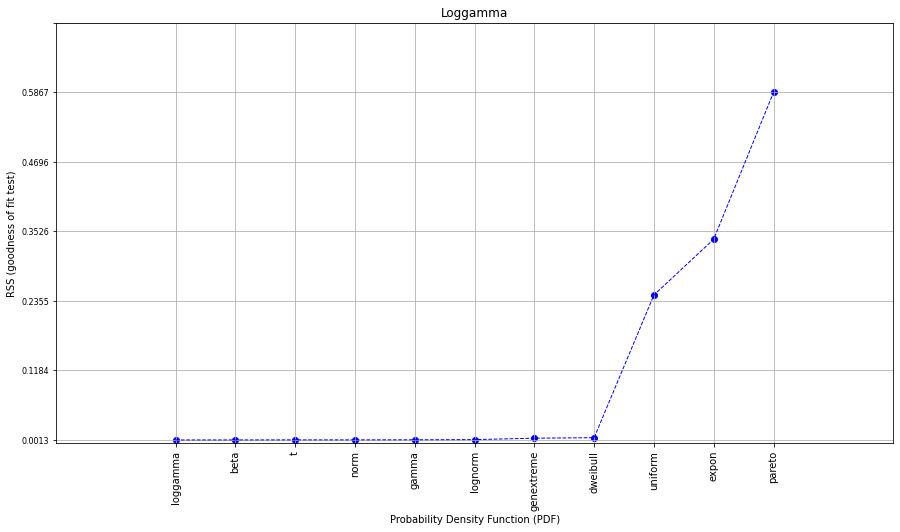

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot: title={'center': 'Loggamma'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

In [5]:
dfit.plot_summary()

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


(None,
 <AxesSubplot: title={'center': '\nRSS\nloggamma(c=605.52, loc=-310.369, scale=48.4532)'}, xlabel='Values', ylabel='Frequency'>)

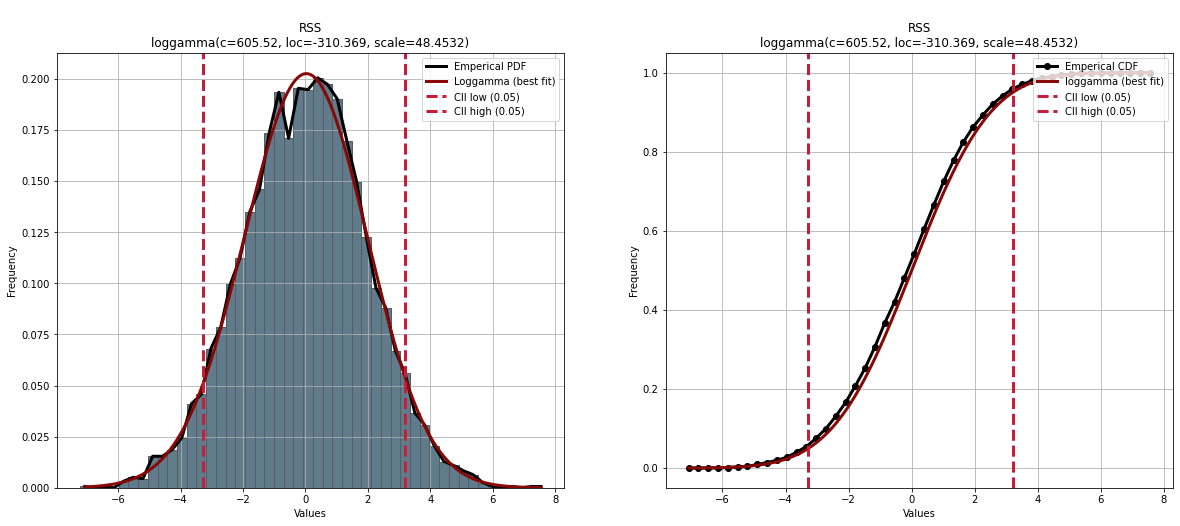

In [6]:
# Make plot
fig, ax = plt.subplots(1,2, figsize=(20, 8))
dfit.plot(chart='PDF', ax=ax[0])
dfit.plot(chart='CDF', ax=ax[1])


[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot: title={'center': '\nRSS\nloggamma(c=605.52, loc=-310.369, scale=48.4532)'}, xlabel='Values', ylabel='Frequency'>)

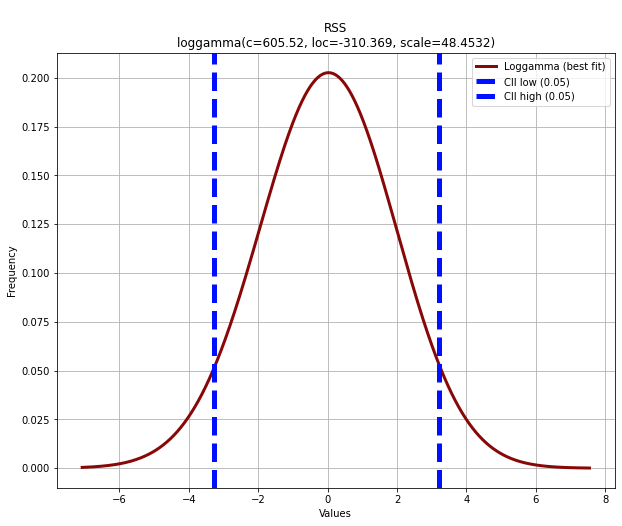

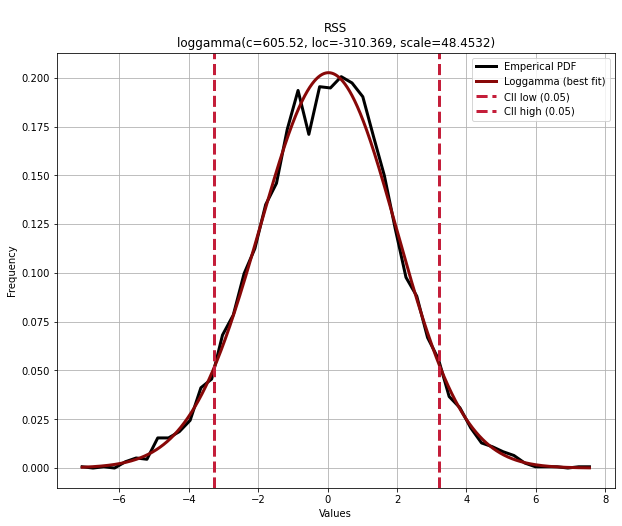

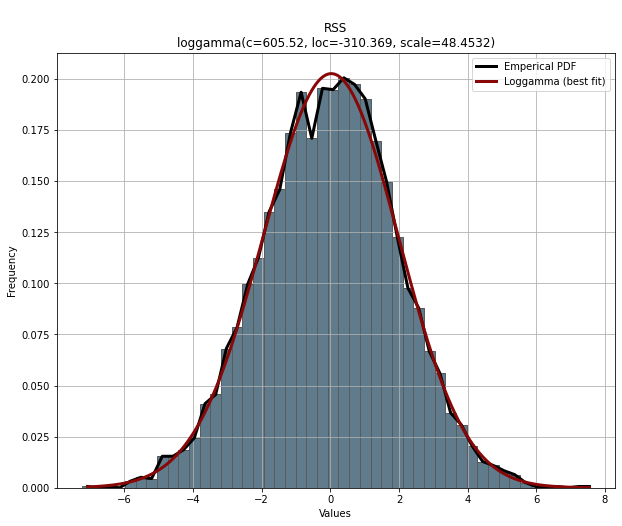

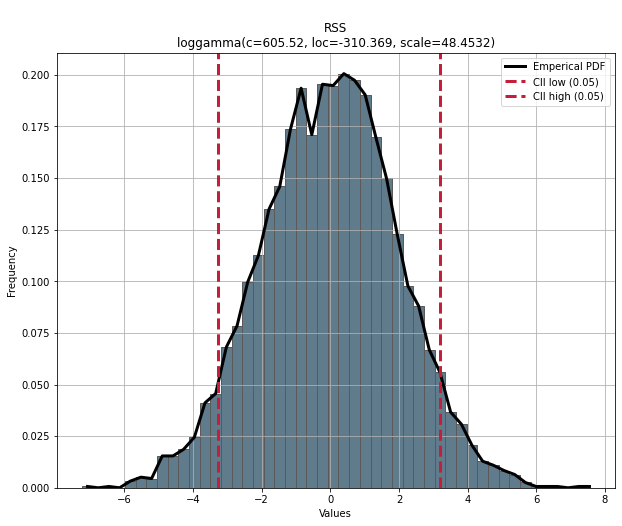

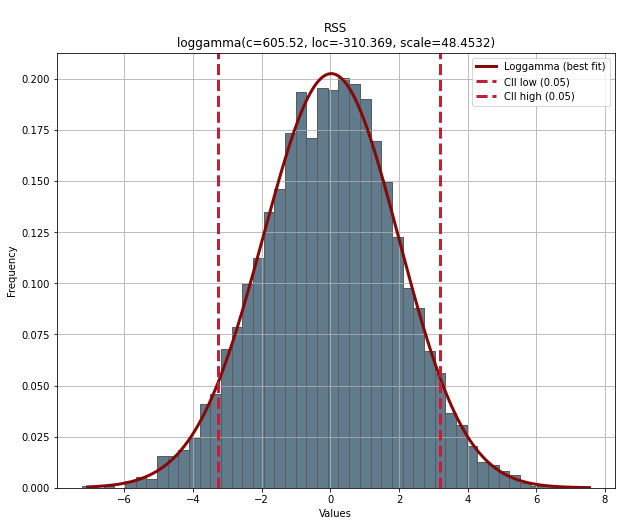

In [7]:
dfit.plot(bar_properties=None, emp_properties=None, cii_properties={'color': '#000fff', 'linewidth': 5},  figsize=(10,8))

dfit.plot(bar_properties=None, figsize=(10,8))
dfit.plot(cii_properties=None, figsize=(10,8))
dfit.plot(pdf_properties=None, figsize=(10,8))
dfit.plot(emp_properties=None, figsize=(10,8))


## Predictions on new data

In [16]:
# Make prediction on new data
results = dfit.predict(y, todf=True)

[distfit] >INFO> Compute significance for 9 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Mark 5 significant regions
[distfit] >INFO> Estimated distribution: Loggamma(loc:-310.368721, scale:48.453220)


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot: title={'center': '\nRSS\nloggamma(c=605.52, loc=-310.369, scale=48.4532)'}, xlabel='Values', ylabel='Frequency'>)

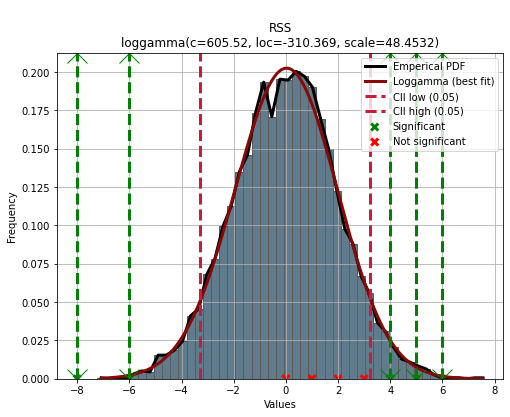

In [17]:
# plot predictions
dfit.plot(chart='PDF', figsize=(8, 6))

In [19]:
results['df']

,y,y_proba,y_pred,P
0,-8.0,0.000347,down,0.000039
1,-6.0,0.004254,down,0.001418
2,0.0,0.499961,none,0.499961
3,1.0,0.343393,none,0.305238
4,2.0,0.197090,none,0.153292
5,3.0,0.092853,none,0.061902
6,4.0,0.035528,up,0.019738
7,5.0,0.011018,up,0.004897
8,6.0,0.004202,up,0.000934


In [21]:
dfit.results.keys()

dict_keys(['y', 'y_proba', 'y_pred', 'P', 'y_bool', 'df'])

In [22]:
print(dfit.results['y_proba'])
print(dfit.results['y_pred'])


[3.46915646e-04 4.25439963e-03 4.99960768e-01 3.43392739e-01
 1.97089884e-01 9.28527606e-02 3.55282550e-02 1.10181536e-02
 4.20192719e-03]
['down' 'down' 'none' 'none' 'none' 'none' 'up' 'up' 'up']


## Bootstrapping Example

In [23]:
# Create random normal data
X = np.random.normal(163, 10, 10000)

# Initialize with 100 bootstraps
dfit = distfit(distr='popular', n_boots=100)

# Fit
results = dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.54 sec] [RSS: 4.7631e-05] [loc=162.839 scale=9.872]
[distfit] >INFO> [expon     ] [0.48 sec] [RSS: 0.0186462] [loc=116.988 scale=45.852]
[distfit] >INFO> [pareto    ] [24.5 sec] [RSS: 0.0206321] [loc=-0.295 scale=117.283]
[distfit] >INFO> [dweibull  ] [10.2 sec] [RSS: 0.0007302] [loc=162.883 scale=8.453]
[distfit] >INFO> [t         ] [18.3 sec] [RSS: 4.84391e-05] [loc=162.840 scale=9.821]
[distfit] >INFO> [genextreme] [87.4 sec] [RSS: 0.00017716] [loc=159.037 scale=9.817]
[distfit] >INFO> [gamma     ] [14.0 sec] [RSS: 4.96381e-05] [loc=-882.385 scale=0.093]
[distfit] >INFO> [lognorm   ] [50.6 sec] [RSS: 5.76776e-05] [loc=-401.401 scale=564.112]
[distfit] >INFO> [beta      ] [24.0 sec] [RSS: 4.6322e-05] [loc=-5226496.166 scale=5227556.975]
[distfit] >INFO> [uniform   ] [0.50 sec] [RSS: 0.0138444] [loc=116.988 scale=85.755]
[distfit] >INFO> [loggamma  ] [18.7 sec] [RSS: 4.60232e-05] [loc=-1770.498 scale=286.

,name,score,bootstrap_score,bootstrap_pass
0,beta,0.000046,0.69,True
1,loggamma,0.000046,0.5,True
2,norm,0.000048,0.39,True
3,t,0.000048,0.38,True
4,lognorm,0.000058,0.33,True
5,genextreme,0.000177,0.29,True
6,gamma,0.00005,0.22,True
7,dweibull,0.00073,0.0,False
8,uniform,0.013844,0.0,False
9,expon,0.018646,0.0,False


In [26]:
dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']]

,name,score,bootstrap_score,bootstrap_pass
0,beta,0.000046,0.69,True
1,loggamma,0.000046,0.5,True
2,norm,0.000048,0.39,True
3,t,0.000048,0.38,True
4,lognorm,0.000058,0.33,True
5,genextreme,0.000177,0.29,True
6,gamma,0.00005,0.22,True
7,dweibull,0.00073,0.0,False
8,uniform,0.013844,0.0,False
9,expon,0.018646,0.0,False


[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


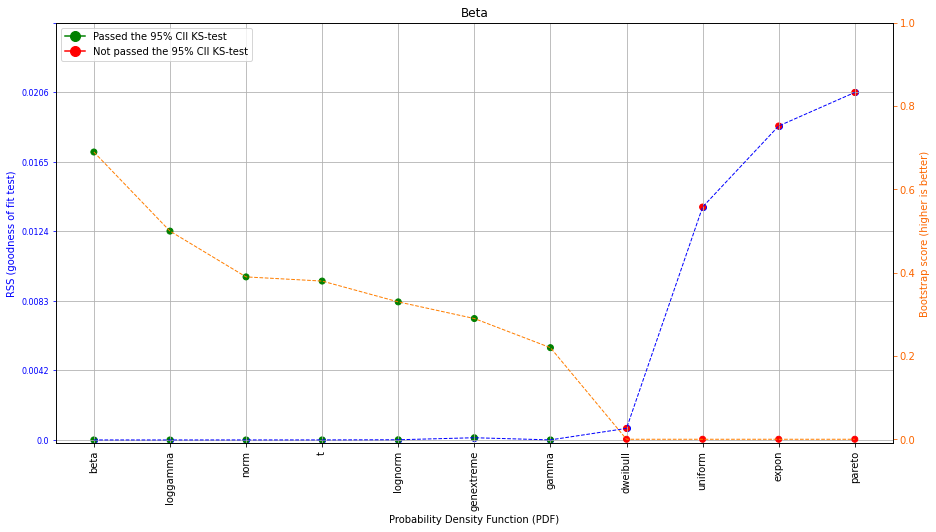

(<Figure size 1080x576 with 2 Axes>,
 <AxesSubplot: title={'center': 'Beta'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

In [24]:
# Make summary plot
dfit.plot_summary()

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-5226496.166452, scale:5227556.974662)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


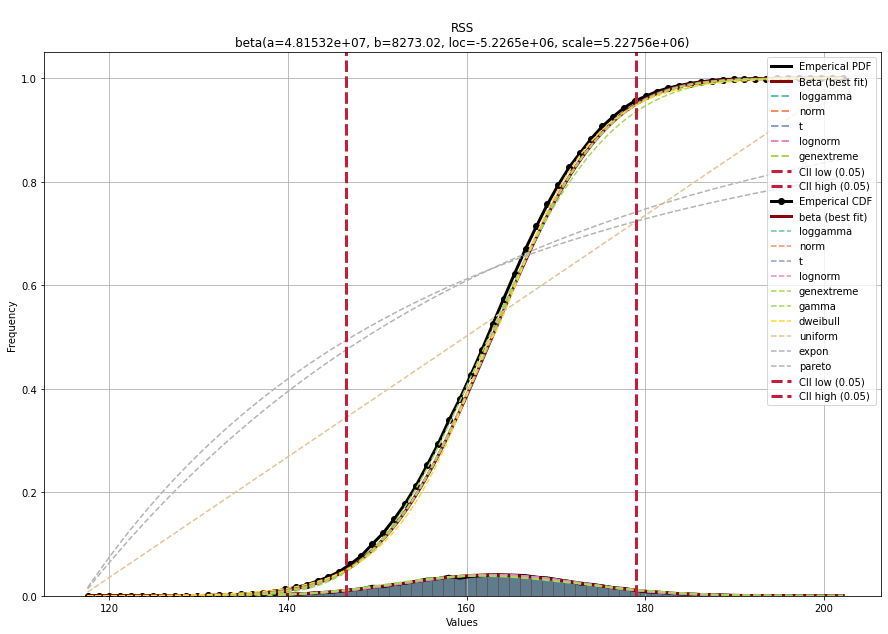

In [27]:
# PDF and CDF plot
fig, ax = dfit.plot(chart='PDF', n_top=5, cmap='Set2', figsize=(15, 10));
dfit.plot(chart='CDF', n_top=10, cmap='Set2', ax=ax);

**Fit data using Discrete distribution; the binomial**

In [28]:
from scipy.stats import binom
# Generate random numbers

# Set parameters for the test-case
n = 8
p = 0.5

# Generate 10000 samples of the distribution of (n, p)
X = binom(n, p).rvs(10000)
print(X)

[3 3 3 ... 5 2 6]


In [29]:
# Initialize distfit for discrete distribution for which the binomial distribution is used. 
dist = distfit(method='discrete')

# Run distfit to and determine whether we can find the parameters from the data.
dist.fit_transform(X)

# Get the model and best fitted parameters.
print(dist.model)

# Best fitted n=8 and p=0.4999 which is great because the input was n=8 and p=0.5
print(dist.model['n'])
print(dist.model['p'])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=0.000166] [n=8] [p=0.502483] [chi^2=2.37e-05]
[distfit] >INFO> Compute confidence intervals [discrete]


{'name': 'binom', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f652e1b7ca0>, 'params': (8, 0.5024825986818838), 'score': 0.00016562951172285635, 'chi2r': 2.3661358817550907e-05, 'n': 8, 'p': 0.5024825986818838, 'CII_min_alpha': 2.0, 'CII_max_alpha': 6.0}
8
0.5024825986818838


[distfit] >INFO> Create PDF plot for the discrete method.


(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot: title={'center': '\nBinom\nn=8, p=0.502483'}, xlabel='Values', ylabel='Frequency'>,
        <AxesSubplot: xlabel='n', ylabel='RSS'>], dtype=object))

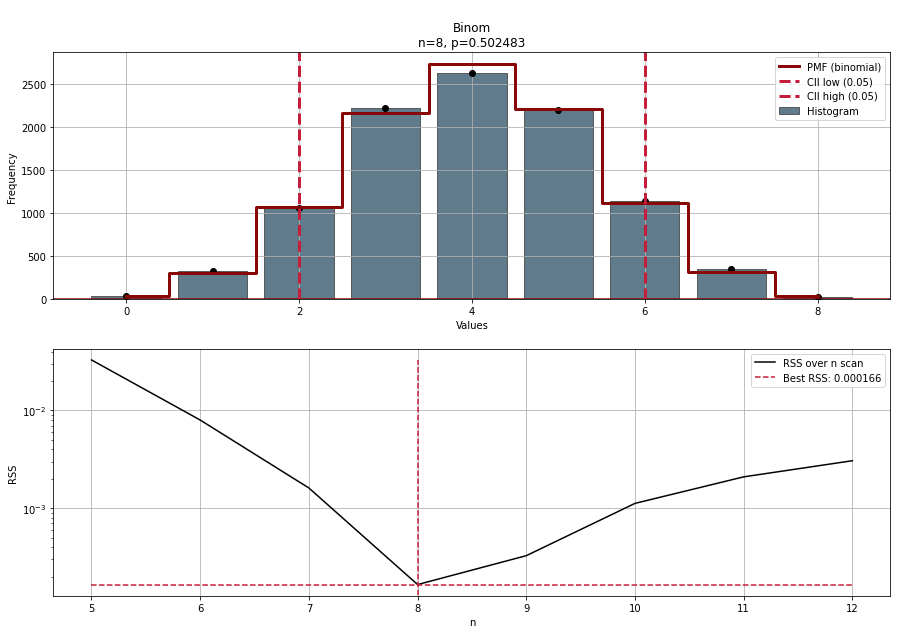

In [30]:
# Make plot
dist.plot(figsize=(15, 10))

In [31]:
# With the fitted model we can start making predictions on new unseen data
y = [0, 1, 10, 11, 12]
results = dist.predict(y)

[distfit] >INFO> Compute significance for 5 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


[distfit] >INFO> Create PDF plot for the discrete method.


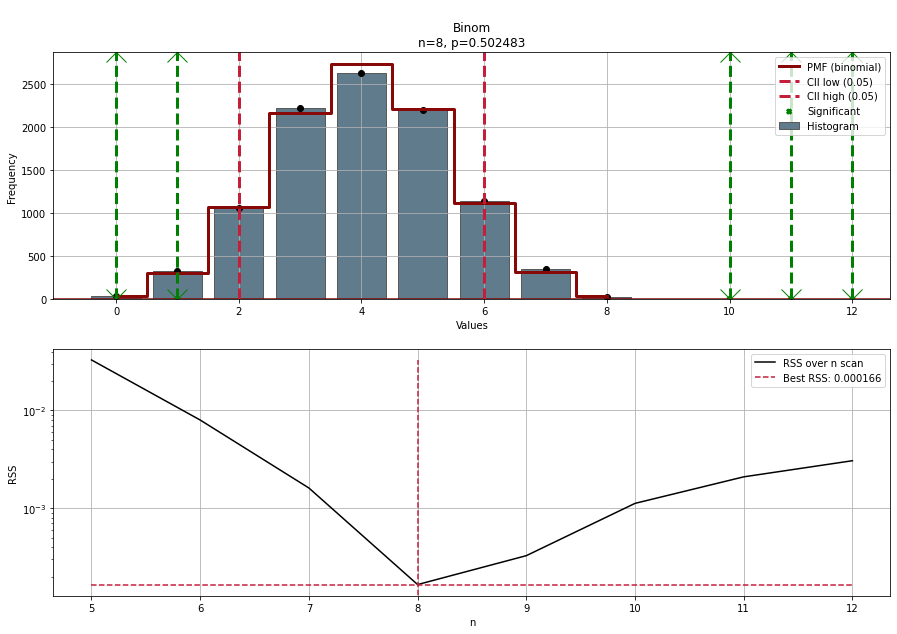

In [32]:
# Make plot with the results
dist.plot(figsize=(15, 10))

df_results = pd.DataFrame(pd.DataFrame(results))

In [ ]:
# Fin